# 4.10 Coding Etiquetee & Excel Reporting 

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import Data Set

In [2]:
#reminding phyton the parent folder path
path = r'C:\Users\juank\Documents\04.2024 Instacar Basket Analysis'

In [4]:
# import data set
df_merged = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_products_customers_merged.pkl'))

# 2. Review Security Implications

In [5]:
# Check column headers
df_merged.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spender_flag', 'users_frequency',
       'order_frequency', 'first_name', 'surname', 'gender', 'State', 'age',
       'date_joined', 'number_dependant', 'family_status', 'income', '_merge'],
      dtype='object')

In [ ]:
#The Identifiable Information (PII) are those related to the customer: first_name, surname, gender,age,number_dependant,family_status and income.

# 3.  Create a regional segmentation of the data and compare customer behavior

In [6]:
# Create a column of regions based on states
df_merged.loc[df_merged['State'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'midwest'

In [7]:
df_merged.loc[df_merged['State'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'south'

In [8]:
df_merged.loc[df_merged['State'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'northeast'

In [9]:
df_merged.loc[df_merged['State'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico', 'Alaska','Washington','Oregon',
'California','Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'west'

In [10]:
# determine difference in spending habits
df_spend_region = df_merged.groupby(['region'])['avg_product_price'].mean()
df_spend_region.reset_index()


,region,avg_product_price
0,midwest,12.715483
1,northeast,11.554997
2,south,12.195577
3,west,11.319834


# 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [11]:
# create exclusion flag column
df_merged.loc[df_merged['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
df_merged.loc[df_merged['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [12]:
df_merged['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    30964564
Excluded         1440295
Name: count, dtype: int64

In [13]:
# Generate DataFrame containing only the data that is not excluded.
df_merged_not_excluded =  df_merged[df_merged['exclusion_flag']=='Not Excluded']

In [14]:
df_merged_excluded = df_merged[df_merged['exclusion_flag']=='Excluded']

In [15]:
len(df_merged_excluded) + len (df_merged_not_excluded) == len(df_merged)

True

In [16]:
# Export new dataframe
df_merged_not_excluded.to_pickle(os.path.join(path,'02. Data','Prepared Data','orders_products_not_excluded.pkl'))

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [17]:
# Establishing age brackets
df_merged_not_excluded.loc[df_merged_not_excluded['age']< 30,'age_type'] = 'young'
df_merged_not_excluded.loc[(df_merged_not_excluded['age'] >= 30) & (df_merged_not_excluded['age']< 60),'age_type'] = 'adult'
df_merged_not_excluded.loc[df_merged_not_excluded['age']>= 60,'age_type'] = 'senior'

C:\Users\juank\AppData\Local\Temp\ipykernel_8660\796391606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['age']< 30,'age_type'] = 'young'


In [18]:
# Establishing income brackets
df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'
df_merged_not_excluded.loc[(df_merged_not_excluded['income'] >= 50000) & (df_merged_not_excluded['income']< 100000),'income_type'] = 'Middle'
df_merged_not_excluded.loc[df_merged_not_excluded['income']>= 100000,'income_type'] = 'High'

C:\Users\juank\AppData\Local\Temp\ipykernel_8660\3361465785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['income'] < 50000,'income_type'] = 'Low'


In [ ]:
# Establishing number_dependants brackets

In [19]:
# Establishing number_dependants brackets
df_merged_not_excluded.loc[df_merged_not_excluded['number_dependant'] == 0,'number_dependant_type'] = 'no dependants'
df_merged_not_excluded.loc[df_merged_not_excluded['number_dependant'] >= 1,'number_dependant_type'] = 'dependant'


C:\Users\juank\AppData\Local\Temp\ipykernel_8660\685535342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded.loc[df_merged_not_excluded['number_dependant'] == 0,'number_dependant_type'] = 'no dependants'


#6. Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Number of Customers')

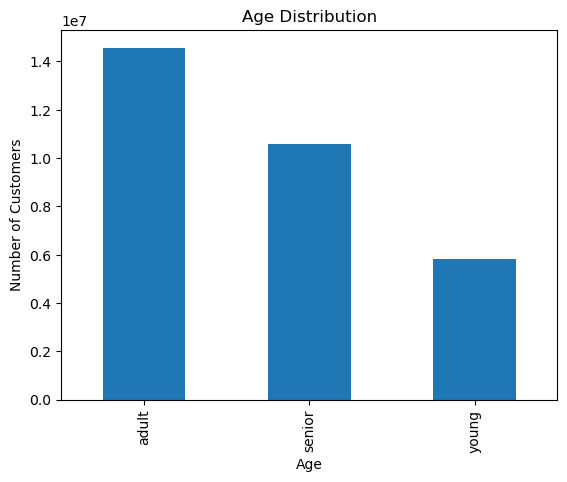

In [20]:
#Create a graph.
bar = df_merged_not_excluded['age_type'].value_counts().plot.bar()
bar.set_title('Age Distribution')
bar.set_xlabel('Age')
bar.set_ylabel('Number of Customers')

In [21]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'age_distribution.png'))

Text(0, 0.5, 'Number of Customers')

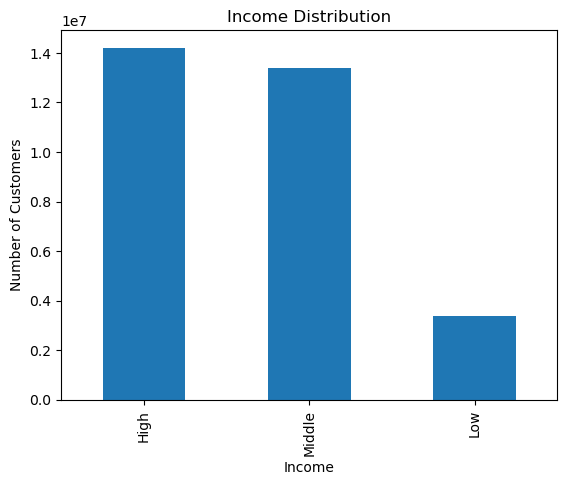

In [22]:
# Create a graph.
bar2 = df_merged_not_excluded['income_type'].value_counts().plot.bar()
bar2.set_title('Income Distribution')
bar2.set_xlabel('Income')
bar2.set_ylabel('Number of Customers')

In [23]:
# Export bar chart
bar2.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'income_distribution.png'))

Text(0.5, 1.0, 'Distribution of Number of Dependents')

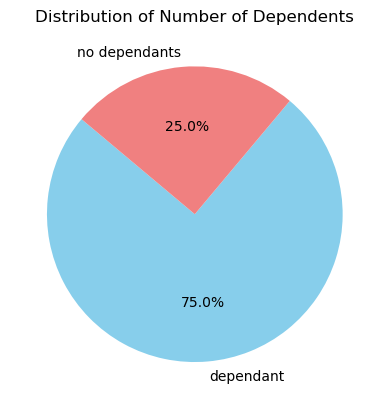

In [24]:
#Create a graph
dependant_counts = df_merged_not_excluded['number_dependant_type'].value_counts()
colors = ['skyblue', 'lightcoral']
plt.pie(dependant_counts, labels=dependant_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Number of Dependents')


In [25]:
#Export the pie chart
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'dependant_type.png'))

<Figure size 640x480 with 0 Axes>

In [26]:
df_merged_not_excluded.groupby(['age_type','income_type']).size().unstack()

income_type,High,Low,Middle
age_type,,,
adult,6626464,1590187,6355806
senior,7395718,872960,2305826
young,185220,899407,4732976


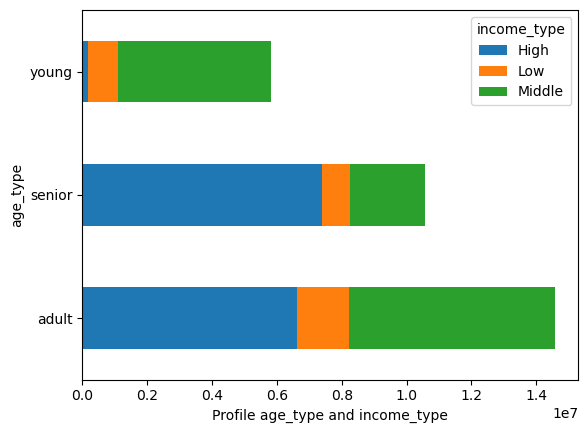

In [27]:

bar3 = df_merged_not_excluded.groupby(['age_type','income_type']).size().unstack().plot.barh(stacked=True).set_xlabel('Profile age_type and income_type')


In [28]:
# export bar chart
bar3.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'profile age_income_type.png'))

In [29]:
df_merged_not_excluded.groupby(['region','income_type']).size().unstack()

income_type,High,Low,Middle
region,,,
midwest,3400093,783764,3077656
northeast,2516484,587137,2361064
south,4663945,1142572,4504622
west,3626880,849081,3451266


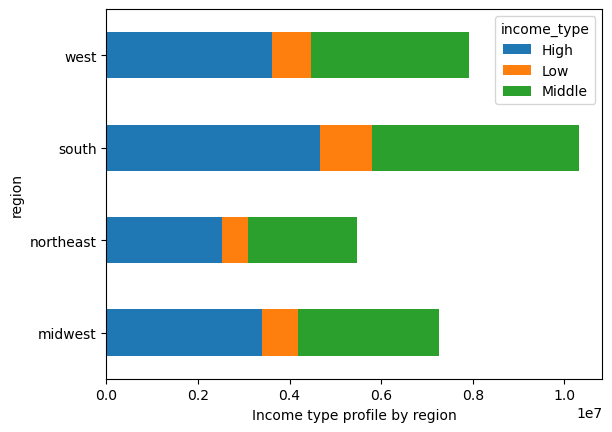

In [30]:
bar4 = df_merged_not_excluded.groupby(['region','income_type']).size().unstack().plot.barh(stacked = True).set_xlabel('Income type profile by region')

In [31]:
bar4.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'profile income by region.png'))

In [32]:
df_merged_not_excluded.groupby(['region','spender_flag']).size().unstack()

spender_flag,High_spender,Low spender
region,,
midwest,148678,7112835
northeast,103120,5361565
south,199339,10111800
west,152288,7774939


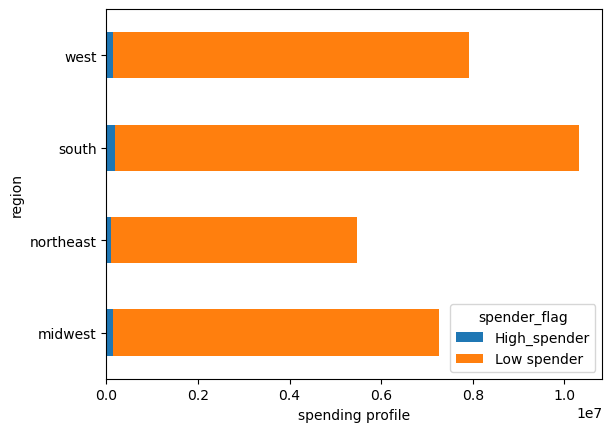

In [33]:
bar5 = df_merged_not_excluded.groupby(['region','spender_flag']).size().unstack().plot.barh(stacked = True).set_xlabel('spending profile')

In [34]:
bar5.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'spendin profile by region.png'))

In [35]:
df_merged_not_excluded.groupby(['number_dependant_type','age_type']).size().unstack()

age_type,adult,senior,young
number_dependant_type,,,
dependant,10925665,7929233,4369985
no dependants,3646792,2645271,1447618


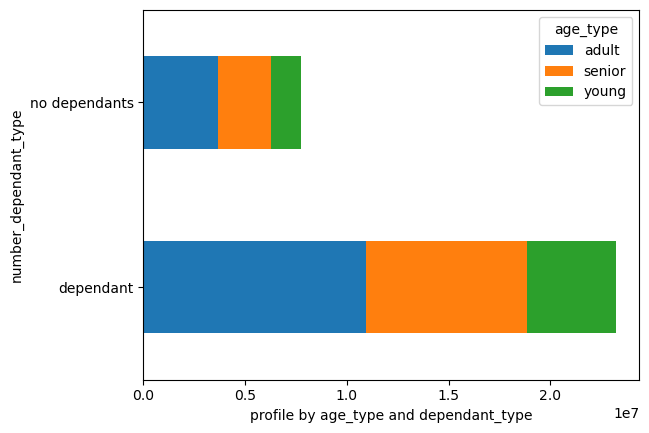

In [36]:
bar6 = df_merged_not_excluded.groupby(['number_dependant_type','age_type']).size().unstack().plot.barh(stacked = True).set_xlabel('profile by age_type and dependant_type')

In [37]:
bar6.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'prfile by age_type and dependant_type.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [38]:
df_merged_not_excluded['total_spend'] = df_merged_not_excluded.groupby('user_id')['prices'].transform('sum')

C:\Users\juank\AppData\Local\Temp\ipykernel_8660\1802482426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_not_excluded['total_spend'] = df_merged_not_excluded.groupby('user_id')['prices'].transform('sum')


In [39]:
df_merged_not_excluded.groupby('loyalty_flag').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                   order_number        
                         mean    min        max         mean min max
loyalty_flag                                                        
Loyal customer    8089.330353  156.0  2101976.9    32.641196   1  99
New customer      1345.178107    5.0   800423.2     4.268295   1  10
Regular customer  3866.475690   15.7  2104114.1    12.347452   1  40

In [40]:
df_merged_not_excluded.groupby('age_type').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                  order_number        
                 mean   min        max         mean min max
age_type                                                   
adult     4835.198560   5.0  1302986.8    17.865629   1  99
senior    4900.089398   6.8  1409778.9    17.807616   1  99
young     4944.249616  10.5  2104114.1    17.803483   1  99

In [41]:
df_merged_not_excluded.groupby('income_type').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                  order_number        
                    mean   min        max         mean min max
income_type                                                   
High         6547.130743  24.7  2104114.1    17.918880   1  99
Low          2525.917679   5.0    24307.1    16.835516   1  99
Middle       3697.694358  11.2  1102546.5    17.994953   1  99

In [42]:
df_merged_not_excluded.groupby('region').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                 order_number        
                  mean  min        max         mean min max
region                                                     
midwest    5191.098827  7.0  2104114.1    17.602828   1  99
northeast  4834.964962  7.7  1409778.9    17.921760   1  99
south      4951.166439  6.8  1206437.5    17.844674   1  99
west       4525.095845  5.0  1003648.4    17.971929   1  99

In [43]:
df_merged_not_excluded.groupby('number_dependant_type').agg({'total_spend': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_spend                 order_number        
                              mean  min        max         mean min max
number_dependant_type                                                  
dependant              4920.314739  6.8  2104114.1    17.792891   1  99
no dependants          4750.413525  5.0  2101976.9    17.957922   1  99

#  8 & 9. Compare your customer profiles with regions and departments/ Produce suitable charts to illustrate your results 

In [46]:
loyalty = df_merged_not_excluded.groupby(['loyalty_flag', 'department_id']).size().unstack()


In [66]:
loyalty

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,609460,10715,379873,3147376,38723,78394,855017,25469,242580,13834,...,202480,560402,221577,294594,1830707,196873,167108,943150,324046,18350
New customer,372271,5839,172104,1336604,28629,43841,396649,15880,144836,4149,...,112464,299576,106179,180196,750056,128117,46708,413107,158335,12713
Regular customer,1140000,17857,568851,4595293,77275,133756,1320235,51711,434720,15468,...,359837,922727,343094,537284,2596419,374867,196576,1410149,521453,33705


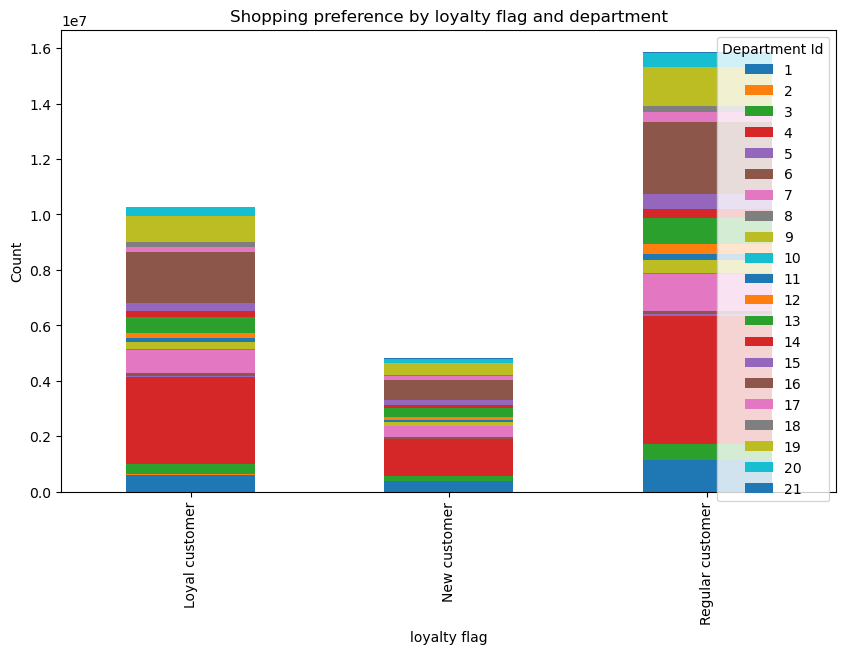

In [83]:
# create a stacked bar by loyal_flag and department_id
bar7 = loyalty.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('loyalty flag')
plt.ylabel('Count')
plt.title('Shopping preference by loyalty flag and department')
plt.legend(title='Department Id')


In [84]:
# Export chart
bar7.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'shopping by loyalty_and_department.png'))

In [59]:
region = df_merged_not_excluded.groupby(['region', 'department_id']).size().unstack()

In [65]:
region

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,...,158260,420334,156155,237459,1212490,166992,95741,645143,234464,15563
northeast,370436,6268,199300,1593004,25017,44678,462929,17734,143817,5599,...,118571,312731,117904,176936,914616,124604,72712,493154,178398,11512
south,709906,11579,371620,3027476,48813,84649,859419,29909,272813,11180,...,224120,591754,223172,337458,1723016,230061,139511,916780,333620,21787
west,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,...,173830,457886,173619,260221,1327060,178200,102428,711329,257352,15906


Text(0.5, 36.72222222222221, 'Department ID')

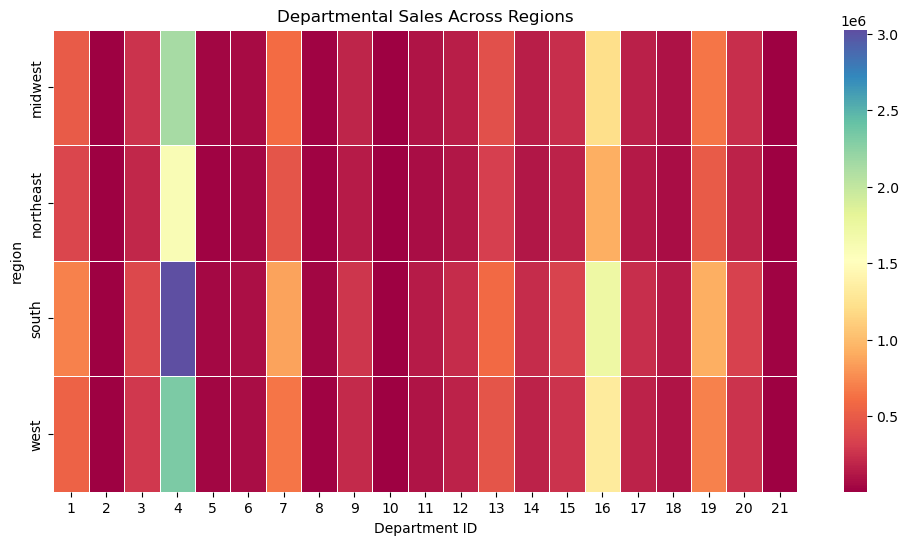

In [63]:
# create heatmap by region and department_id
heatmap1 = plt.figure(figsize = (12,6))
plt.title('Departmental Sales Across Regions')
sns.heatmap(region, cmap = 'Spectral', linewidth=.5)
plt.xlabel('Department ID')

In [64]:
heatmap1.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'departamental sales across regions.png'))

In [76]:
income_depart = df_merged_not_excluded.groupby(['income_type', 'department_id']).size().unstack()

In [78]:
income_depart 

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_type,,,,,,,,,,,,,,,,,,,,,
High,988500,15750,527711,4237002,69142,119991,1126462,45089,392731,14218,...,335552,839964,297596,485253,2406211,319959,196704,1104601,462099,29455
Low,215177,3886,106757,826314,18047,21636,383121,8612,64481,4676,...,34278,166061,91408,78975,502363,87216,29240,559529,106448,6547
Middle,918054,14775,486360,4015957,57438,114364,1062318,39359,364924,14557,...,304951,776680,281846,447846,2268608,292682,184448,1102276,435287,28766


Text(0.5, 36.72222222222221, 'ID de departamento')

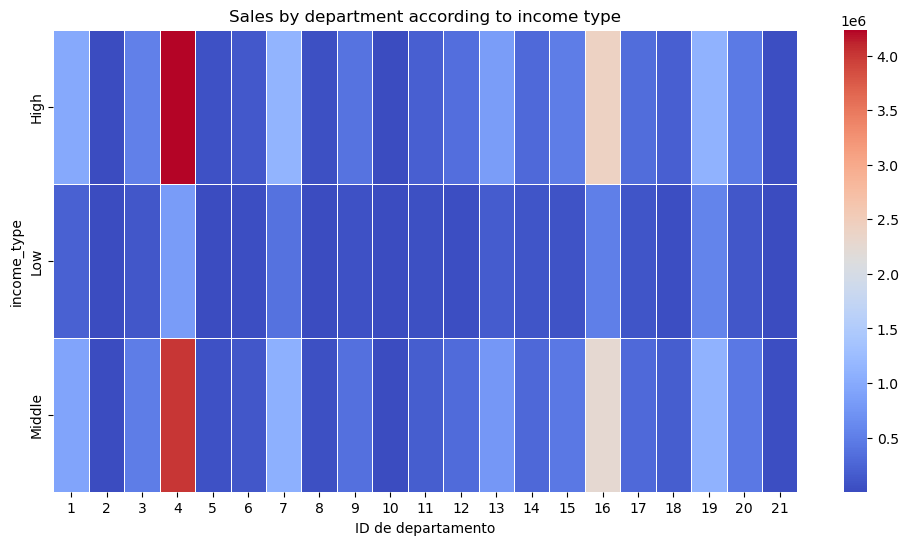

In [77]:
# create heatmap by income_type and department_id
heatmap2 = plt.figure(figsize=(12, 6))
plt.title('Sales by department according to income type')
sns.heatmap(income_depart, cmap='coolwarm', linewidths=.5)
plt.xlabel('ID de departamento')


In [79]:
heatmap2.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'sales by departmen_income_type.png'))

In [81]:
# create heatmap by dependant_type and department_id
dependant_profile = df_merged_not_excluded.groupby(['number_dependant_type','department_id']).size().unstack()

In [86]:
dependant_profile

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
number_dependant_type,,,,,,,,,,,,,,,,,,,,,
dependant,1592383,25697,839433,6803832,107800,191530,1926560,69458,617840,25451,...,508903,1338801,504418,761054,3882806,528499,307064,2075968,750452,48833
no dependants,529348,8714,281395,2275441,36827,64461,645341,23602,204296,8000,...,165878,443904,166432,251020,1294376,171358,103328,690438,253382,15935


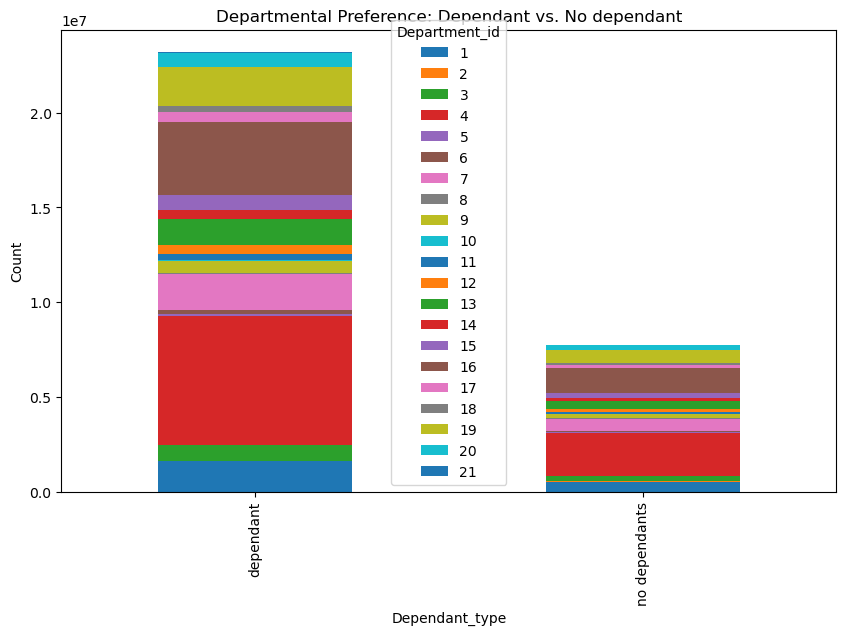

In [85]:
create a stacked bar by dependant_type and department_id
bar8 = dependant_profile.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Dependant_type')
plt.ylabel('Count')
plt.title('Departmental Preference: Dependant vs. No dependant')
plt.legend(title='Department_id')

In [88]:
# Export chart
bar8.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Departmental Preference: Dependant vs. No dependant.png'))

In [87]:
df_merged_not_excluded['department_id'].value_counts()

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

Text(0, 0.5, 'Count')

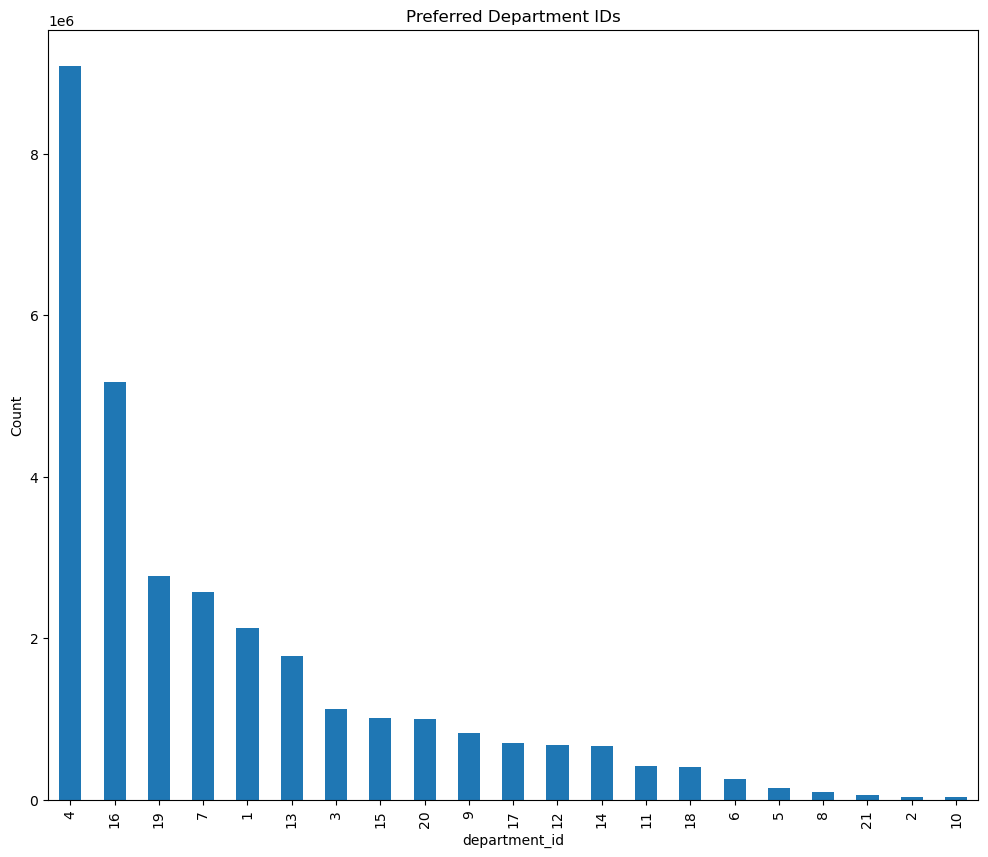

In [90]:
# create department id bar chart
plt.figure(figsize = (12,10))
bar9 = df_merged_not_excluded['department_id'].value_counts().plot.bar()
plt.title('Preferred Department IDs')
plt.ylabel('Count')

In [91]:
bar9.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'preferred department_id.png'))